# Competition 1 #

#### Research Question & Goal ####

What are the determinants of the IPO underpricing phenomena? It is our job as a group to understand and identify the underlying determinants that factor into IPO underpricing.

### Business Understanding ###

According to Investopedia.com, Underpricing is the listing of an intial public offering (IPO) below its market value. When the offer price of the stock is lower than the price of the first trade, the stock is considered to be underpriced. This will only last for a short amount of time, as the demand of the stock is going to drive it back up to its value.

From a company standpoint, they wish to have the intial public offering as high as possible, which in turn raises the most capital. The quantitative factors that go into an initial public offering are all financial analysis reports from the company itself. Before the IPO, the company will be analyzed by its sales, expenses, earnings, and cash flow. Furthermore, a company's earnings and expected earnings growth are the biggest factors in the IPO. Marketability in a specific industry and the general market also can drive an IPO up or down.

Once the investment bankers or IPO underwriters determine the IPO price of the company's stock, the day before the stock is offered publically, the company will market the IPO to potential investors. For historical purposes, IPOs are viewed as risky investments because of the lack of historical data that is collected on them. The less liquidity that the stock/company has and predicatble IPO shares are going to be, the more likely they are going to be underprices to compensate for assumed risk. Company's also underprice their IPO to entice more investors to buy stocks to raise more capital.

With all of this information about intial public offerings, is there a few determinants that can be identified as to why the phenomenon of underpricing exists? The dataset that we have been provided provide information about companies and information regarding their IPO, such as IPO Offering, IPO Characteristics, Textual Characterisitics, Sentiment Characteristics, Target Variables, Control Variables, and IPO Identifiers.

The variables that have been provided are listed below:

 - P(IPO) - Offer Price
 - P(H) - Price Range Higher Bound
 - P(L) - Price Range Lower Bound
 - P(1Day) - First Day Trading Price
 - C1 - Days
 - C2 - Top-Tier Dummy
 - C3 - Earnings per Share
 - C4 - Prior NASDAQ 15-Day Returns
 - C5 - Outstanding Shares
 - C6 - Offering Shares
 - C7 - Sales
 - T1 - Number of Sentences
 - T2 - Number of Words
 - T3 - Number of Real Words
 - T4 - Number of Long Sentences
 - T5 - Number of Long Words
 - S1 - Number of Positive Words
 - S2 - Number of Negative Words
 - S3 - Number of Uncertain Words
 - Y1 - Pre-IPO Price Revision
 - Y2 - Post-IPO Initial Return
 - C3' - Positive EPS Dummy
 - C5' - Share Overhang
 - C6' - Up Revision
 - I1 - Ticker
 - I2 - Company Name
 - I3 - Standard Industry Classifier

## Data Understanding ##

In [1]:
# Importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn import datasets
from scipy.stats import iqr
from sklearn import preprocessing

# Read in the .xlsx datafile and converting into a DataFrame
data = pd.read_excel("../2019-competition1-the-dundies/Competition1_raw_data.xlsx",header=0,na_values="-")
df_data = pd.DataFrame(data)

In [2]:
# Understanding the datatypes for the features
print(df_data.head())

     I1                                  I2    I3  P(IPO)  P(H)  P(L)  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674    10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834     8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834     7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834    11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492    21.0  21.0  19.0   

     P(1Day)     C1   C2    C3  ...            C6       C7     T1       T2  \
0  11.870000  122.0  1.0  3.43  ...    10600000.0   51.345  470.0  12719.0   
1   7.250000  259.0  0.0 -1.62  ...     2400000.0   25.936  791.0  21792.0   
2   6.700000   90.0  1.0 -1.24  ...     5000000.0    7.378  201.0   5262.0   
3  12.390000  209.0  1.0 -0.91  ...     4500000.0    8.526  328.0   8259.0   
4  56.599998   80.0  1.0  0.07  ...     8250000.0  632.298  572.0  14830.0   

        T3     T4      T5    S1     S2     S3  
0  11560.0  301.0   690.0  62.0  117.0  139.

__We will remove the column headers that have parentheses in them to underscores, as it will be easier to reference those columns.__

In [3]:
# Renaming Column Headers with '()' in it
cols = ['I1','I2','I3','P_IPO','P_H','P_L','P_1Day','C1','C2','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']

# Define columns of 'df_data' using 'cols'
df_data.columns = cols

# Displaying the first 5 rows of dataframe 'df_data'
# it should show 22 columns
print(df_data.head())

     I1                                  I2    I3  P_IPO   P_H   P_L  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674   10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834    8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834    7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834   11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492   21.0  21.0  19.0   

      P_1Day     C1   C2    C3  ...            C6       C7     T1       T2  \
0  11.870000  122.0  1.0  3.43  ...    10600000.0   51.345  470.0  12719.0   
1   7.250000  259.0  0.0 -1.62  ...     2400000.0   25.936  791.0  21792.0   
2   6.700000   90.0  1.0 -1.24  ...     5000000.0    7.378  201.0   5262.0   
3  12.390000  209.0  1.0 -0.91  ...     4500000.0    8.526  328.0   8259.0   
4  56.599998   80.0  1.0  0.07  ...     8250000.0  632.298  572.0  14830.0   

        T3     T4      T5    S1     S2     S3  
0  11560.0  301.0   690.0  62.0  117.0  139.0  
1 

In [4]:
# Describing the Data
print(df_data.describe())

            P_IPO         P_H         P_L       P_1Day           C1  \
count  677.000000  672.000000  672.000000   660.000000   660.000000   
mean    13.837666   15.481190   13.515045    25.934766   149.728788   
std      6.053731    6.653429    5.835646    73.234948   152.817467   
min      3.000000    0.000000    3.000000     0.000000    10.000000   
25%     10.000000   12.500000   11.000000    11.000000    85.000000   
50%     13.500000   15.000000   13.000000    14.845000   107.000000   
75%     17.000000   17.000000   15.000000    20.485000   155.250000   
max     85.000000  135.000000  108.000000  1159.200562  2087.000000   

               C2           C3          C4            C5            C6  \
count  660.000000   646.000000  660.000000  6.760000e+02  6.760000e+02   
mean     0.859091     1.788904    0.007282  4.935776e+07  1.241519e+07   
std      0.348192   162.666532    0.033318  1.043764e+08  2.512855e+07   
min      0.000000  -786.239000   -0.162352  3.693227e+06  5.2500

In [5]:
# Defining the Data Types of the Data
print(df_data.dtypes)

I1         object
I2         object
I3         object
P_IPO     float64
P_H       float64
P_L       float64
P_1Day    float64
C1        float64
C2        float64
C3        float64
C4        float64
C5        float64
C6        float64
C7        float64
T1        float64
T2        float64
T3        float64
T4        float64
T5        float64
S1        float64
S2        float64
S3        float64
dtype: object


In [6]:
# Changing column `I3` to a float for binning in the future
df_data.I3.astype(str)
df_data.loc[(df_data.I1 == 'UPG')]
df_data.loc[(df_data.I1 == 'DTSI')]
df_data.loc[(df_data.I1 == 'RLD')]
df_data.loc[(df_data.I1 == 'DLB')]

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,1.0,0.47,...,27500000.0,289.041,500.0,15288.0,14243.0,360.0,912.0,69.0,122.0,165.0


In [8]:
# Imputing for column `I3` due to its multiple values for certain rows
df_data.loc[(df_data.index[620]), 'I3']=7389
df_data.loc[(df_data.index[499]), 'I3']=3663
df_data.loc[(df_data.index[187]), 'I3']=3651
df_data.loc[(df_data.index[174]), 'I3']=6794
# Changing column `I3` to float datatype
df_data.I3.astype(float)

0      3674.0
1      2834.0
2      2834.0
3      2834.0
4      4492.0
5      7379.0
6      2836.0
7      2834.0
8      7372.0
9      3714.0
10        NaN
11     2854.0
12     2835.0
13     2834.0
14     3845.0
15     7389.0
16     5047.0
17     3568.0
18     3661.0
19     4512.0
20     2834.0
21     2911.0
22     8099.0
23     2834.0
24     2836.0
25     2834.0
26     3674.0
27     3674.0
28     4931.0
29     2834.0
        ...  
652    4953.0
653    6324.0
654    2834.0
655    7372.0
656    7389.0
657    8711.0
658    2869.0
659    1311.0
660    7359.0
661    7929.0
662    2911.0
663    7011.0
664    7372.0
665    7389.0
666    1311.0
667    2834.0
668    2835.0
669    8742.0
670    2221.0
671    3841.0
672    1311.0
673    7389.0
674    4911.0
675    2834.0
676    3341.0
677    7514.0
678    3845.0
679    3663.0
680    5600.0
681    2510.0
Name: I3, Length: 682, dtype: float64

### Understanding Missing Values ###

Upon intial investigation, there seem to be no missing values, which is great.

But doing some further digging, there are missing values, but the 'for loop', it does not pick up on dashes/hyphens. To show that there are missing values in the dataset.

In [9]:
# Creating an empty list for column names
names = []

# Creating an empty list for the number of null values in each column
values = []

# Checking for Missing Values
for col in df_data.columns:
    names.append(col)
    values.append(df_data[col].isnull().sum())
    print(names[-1],values[-1])

I1 0
I2 0
I3 8
P_IPO 5
P_H 10
P_L 10
P_1Day 22
C1 22
C2 22
C3 36
C4 22
C5 6
C6 6
C7 72
T1 1
T2 1
T3 1
T4 1
T5 1
S1 1
S2 1
S3 1


Text(0, 0.5, 'Count of Missing Value')

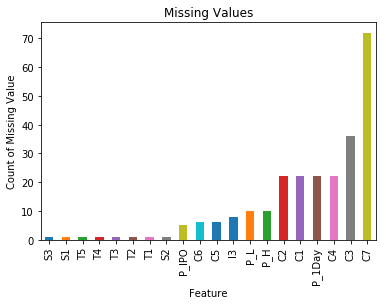

In [10]:
# Creating a graph to visulize missing values
missing_values = df_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()

# Adding peripherials to graph
plt.title('Missing Values')
plt.xlabel('Feature')
plt.ylabel('Count of Missing Value')

##### More Missing Values ####

There are only two columns `I1` and `I2` that do not have any "hyphens" or missing values.

The issue that we have now is how to deal with these missing values.

It is unique to see that columns `T1` through `S3` all have 1 missing value. Is it safe to assume that the individual missing values from those columns all belong to one record? Possibly. We will have to identify that one record if that is the case.

#### Imputing Missing Values ####

We are going to start by imputing values 1 column at a time, as not all the columns will call for the same imputation.

We will begin with column `I3`, as we can find the SIC code online through multiple websites for cross-checking and validation.

In [11]:
# Identifying the row that has the missing values for Column 'I3'
df_data[df_data['I3'].isnull()]

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0
86,BLT,BLOUNT INTERNATIONAL INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,538.0,12732.0,11126.0,301.0,631.0,94.0,172.0,116.0
268,GSL,GLOBAL SIGNAL INC,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,NaN,631.0,19479.0,17409.0,451.0,976.0,71.0,252.0,155.0
330,KFI,KKR Financial Holdings LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0
400,NAUH,"National American University Holdings, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,290.0,8454.0,7137.0,192.0,384.0,45.0,68.0,139.0
490,RCH,"CHINA CGAME, INC.",NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,737000.0,NaN,322.0,9820.0,8893.0,230.0,410.0,61.0,92.0,91.0
597,TRMM,"Access to Money, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,494.0,12004.0,10226.0,277.0,560.0,46.0,100.0,91.0
614,TZOO,TRAVELZOO INC,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,146.0,3600.0,3189.0,88.0,181.0,5.0,26.0,38.0


In [12]:
# Imputation for SIC Codes for Column 'I3'
df_data.loc[df_data.index[10], 'I3']=8748
df_data.loc[df_data.index[86], 'I3']=5251
df_data.loc[df_data.index[268], 'I3']=6282
df_data.loc[df_data.index[330], 'I3']=7389
df_data.loc[df_data.index[400], 'I3']=6211
df_data.loc[df_data.index[490], 'I3']=7372
df_data.loc[df_data.index[597], 'I3']=6099
df_data.loc[df_data.index[614], 'I3']=4724

# Redisplaying Column 'I3' checking for missing values after imputing
df_data[df_data['I3'].isnull()]

# Making the datatype of column `I3` str
df_data['I3'].astype(str);

In [13]:
# Imputation for IPO final offering price for 'P_IPO'
df_data.loc[df_data.index[10], 'P_IPO']=9.5
df_data.loc[df_data.index[86], 'P_IPO']=16.5
df_data.loc[df_data.index[330], 'P_IPO']=24.0
df_data.loc[df_data.index[400], 'P_IPO']=8.0
df_data.loc[df_data.index[597], 'P_IPO']=11.0

df_data[df_data['P_IPO'].isnull()]

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [14]:
# Imputation for `C7` Sales
## We are using the `Mean` for imputing the sales values for column `C7`
df_data['C7'].fillna(df_data['C7'].mean(), inplace=True)

In [15]:
# Imputing for `P_H` and `P_L`
df_data['P_H'].fillna(df_data['P_H'].mean(), inplace=True)
df_data['P_L'].fillna(df_data['P_L'].mean(), inplace=True)

In [16]:
# Imputing for `P_1Day`
## We are using the 'Median' for imputing the P_1Day missing values, as the mean is higher than the median, indicating skewness
df_data['P_1Day'].fillna(df_data['P_1Day'].median(), inplace=True)

In [17]:
# Imputing for `C1` through `C4`
## We are imputing for column `C1` using the median
df_data['C1'].fillna(df_data['C1'].median(), inplace=True)

## We are imputing for column `C2` using the mode
df_data['C2'].fillna(df_data['C2'].mode()[0], inplace=True)

## We are imputing for column `C3` using the mean
df_data['C3'].fillna(df_data['C3'].mean(), inplace=True)

## We are imputing for column `C4` using the mean
df_data['C4'].fillna(df_data['C4'].mean(), inplace=True)

## We are imputing for column `C5` using the mean
df_data['C5'].fillna(df_data['C5'].mean(), inplace=True)

## We are imputing for column `C6` using the median
df_data['C6'].fillna(df_data['C6'].median(), inplace=True)

In [18]:
# Imputation for columns `T1` through `S3`
## There is only 1 row that has these missing values in these columns
### EURX EURAND N.V.
df_data.loc[df_data['T1'].isnull()]

# Imputing the values for this row would be the most accurate if we find the data from the year of EURX's IPO (2007)
## We will impute the values using the Mean of the columns with missing values
df_data['T1'].fillna(df_data['T1'].mean(), inplace=True)
df_data['T2'].fillna(df_data['T2'].mean(), inplace=True)
df_data['T3'].fillna(df_data['T3'].mean(), inplace=True)
df_data['T4'].fillna(df_data['T4'].mean(), inplace=True)
df_data['T5'].fillna(df_data['T5'].mean(), inplace=True)
df_data['S1'].fillna(df_data['S1'].mean(), inplace=True)
df_data['S2'].fillna(df_data['S2'].mean(), inplace=True)
df_data['S3'].fillna(df_data['S3'].mean(), inplace=True)

# Re-checking to make sure that there is no row with any missing values in column `T1`
df_data.loc[df_data['T1'].isnull()]

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [19]:
# Checking columns to see if they have values of 0 or less than 0
df_data.loc[df_data['T3']<=0]
df_data.loc[df_data['T4']<=0]
df_data.loc[df_data['T5']<=0]
df_data.loc[df_data['S1']<=0]

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12.0,12.0,10.0,17.98,133.0,1.0,0.14,...,18000000.0,32.179,419.0,10764.0,9856.0,259.0,643.0,-1.0,97.0,134.0


In [20]:
# Fixing vales that are '0' and 'negatives' as they will generate RunTimeErrors in the logtransformations
df_data['T3']=df_data.loc[(df_data['T3']<=0)] = df_data['T3'].median()
df_data['T4']=df_data.loc[(df_data['T4']<=0)] = df_data['T4'].median()
df_data['T5']=df_data.loc[(df_data['T5']<=0)] = df_data['T5'].median()
df_data['S1']=df_data.loc[(df_data['S1']<=0)] = df_data['S1'].median()

In [21]:
### Create new columns for T and S dividing with T1 and T2
df_data["C3'"]=np.where(df_data['C3']>0,1,0)
df_data["C5'"]=(df_data['C5']/df_data['C6'])
df_data["C6'"]=np.where(df_data['P_IPO']>((df_data['P_H']+df_data['P_L'])/2), (df_data['P_IPO']-(((df_data['P_H']+df_data['P_L'])/2))/((df_data['P_H']+df_data['P_L'])/2))*100,0)
df_data["T3'"]=df_data['T3']/df_data['T2']
df_data["T4'"]=df_data['T4']/df_data['T1']
df_data["T5'"]=df_data['T5']/df_data['T2']
df_data["S1'"]=df_data['S1']/df_data['T2']
df_data["S2'"]=df_data['S2']/df_data['T2']
df_data["S3'"]=df_data['S3']/df_data['T2']

In [22]:
### Adding Target Variables
df_data['Y1']=np.where(df_data['P_IPO']<((df_data['P_H']+df_data['P_L'])/2),1,0)
df_data['Y2']=np.where(df_data['P_IPO']<df_data['P_1Day'],1,0)

In [23]:
# Dropping columns that are no longer needed
df_data = df_data.drop(['C3','C5','C6'], axis=1)

In [24]:
print(df_data.head())

     I1                                  I2      I3  P_IPO   P_H   P_L  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674.0   10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834.0    8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834.0    7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834.0   11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492.0   21.0  21.0  19.0   

      P_1Day     C1   C2        C4 ...        C5'     C6'       T3'       T4'  \
0  11.870000  122.0  1.0  0.029074 ...   3.864345   900.0  0.848259  0.594681   
1   7.250000  259.0  0.0 -0.013352 ...  12.028832     0.0  0.495090  0.353350   
2   6.700000   90.0  1.0  0.020715 ...   3.369134     0.0  2.050361  1.390547   
3  12.390000  209.0  1.0  0.020023 ...   3.299697     0.0  1.306332  0.852134   
4  56.599998   80.0  1.0 -0.034895 ...   3.726269  2000.0  0.727512  0.488636   

        T5'       S1'       S2'       S3'  Y1  Y2  
0  0.049100  0.0

In [25]:
# Dropping columns that have been used to create "prime" columns
df_data = df_data.drop(['T1','T2','T3','T4','T5','S1','S2','S3'],axis=1)
df_data.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C4,...,C5',C6',T3',T4',T5',S1',S2',S3',Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,0.029074,...,3.864345,900.0,0.848259,0.594681,0.049100,0.004717,0.009199,0.010929,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-0.013352,...,12.028832,0.0,0.495090,0.353350,0.028657,0.002753,0.011105,0.010876,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,0.020715,...,3.369134,0.0,2.050361,1.390547,0.118681,0.011403,0.006271,0.011403,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,0.020023,...,3.299697,0.0,1.306332,0.852134,0.075614,0.007265,0.007144,0.013319,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,-0.034895,...,3.726269,2000.0,0.727512,0.488636,0.042111,0.004046,0.010047,0.011261,0,1


In [26]:
# Re-checking imputations were correctly filling in missing values
for col in df_data.columns:
    names.append(col)
    values.append(df_data[col].isnull().sum())
    print(names[-1],values[-1])

I1 0
I2 0
I3 0
P_IPO 0
P_H 0
P_L 0
P_1Day 0
C1 0
C2 0
C4 0
C7 0
C3' 0
C5' 0
C6' 0
T3' 0
T4' 0
T5' 0
S1' 0
S2' 0
S3' 0
Y1 0
Y2 0


__All of our missing values have been filled in using the appropriate methods for imputing their values. We most likely have changed the way that we impute the data based on our results from our model, to see if altering the way that we impute would affect the results.__

## Handling Skew ##

In [27]:
df_data.skew()

I3        18.286216
P_IPO      3.372736
P_H        9.283332
P_L        7.159347
P_1Day    12.522598
C1         5.747573
C2        -2.123926
C4        -0.485756
C7        12.382952
C3'       -0.117764
C5'       10.624377
C6'        1.149979
T3'             NaN
T4'        1.490300
T5'             NaN
S1'             NaN
S2'             NaN
S3'             NaN
Y1        -0.041155
Y2        -0.879384
dtype: float64

## Normalising ##

We understand that data is not going to be normally distributed. We must identify what distribution each feature/attribute has, and figure out a method to normally distribute that data to move on with our model.

We will create histograms for all data that has a `float64` data-type.

In [56]:
# Creating a 'for loop' to display each of the columns in a histogram
# would be the most efficient way to display the distribution of the features

## Creating a new variable `new_cols` to store all the features we would like
## to display with histograms
new_cols = ['C1','C4',"C5'","C6'",'C7',"T3'","T4'","T5'","S1'","S2'","S3'"]

In [29]:
# Printing Skewn Value for Each Feature
## new_cols = ['P_IPO','P_H','P_L','P_1Day','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
print("skew : ",skew(df_data[new_cols]))

skew :  [ 5.73492446 -0.48468728 10.60099565  1.14744784 12.35570026         nan
  1.4870202          nan         nan         nan         nan]


/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/stats.py:943: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


The values that have `nan` for skewness

In [30]:
def log_transform(feature):
    df_data[feature] = np.log1p(df_data[feature].values) # does a log transform on x+1
log_transform('C1')
log_transform('C4')
log_transform("C5'")
log_transform("C6'")
log_transform('C7')
log_transform("T3'")
log_transform("T4'")
log_transform("T5'")
log_transform("S1'")
log_transform("S2'")
log_transform("S3'")

ValueError: range parameter must be finite.

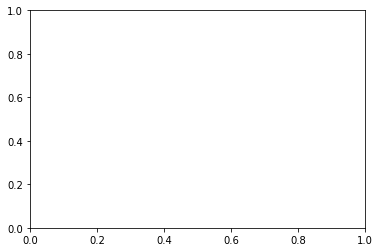

In [32]:
# Re-plotting the distributions of the attributes
plt.hist(df_data["T3'"])

## Z-Score with Outliers ##

In [ ]:
## 

In [40]:
# Rechecking the dataframe
print(df_data.head())

     I1                                  I2      I3     P_IPO       P_H  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674.0  2.397895  2.351375   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834.0  2.197225  2.397895   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834.0  2.079442  2.708050   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834.0  2.525729  2.833213   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492.0  3.091042  3.091042   

        P_L    P_1Day        C1   C2        C4 ...       C5'       C6'  \
0  2.251292  2.554899  4.812184  1.0  0.028660 ...  1.581932  6.803505   
1  2.197225  2.110213  5.035328  0.0 -0.013442 ...  1.782453  0.000000   
2  2.564949  2.041220  4.510860  1.0  0.020503 ...  1.474565  0.000000   
3  2.708050  2.594508  5.347108  1.0  0.019825 ...  1.458545  0.000000   
4  2.995732  4.053523  4.394449  1.0 -0.035518 ...  1.553136  7.601402   

        T3'       T4'       T5'       S1'       S2'       S3'  Y1  Y2  
0  0.614244  0.466674  0.047932 

## Binning ##

In [41]:
## Importing Image from the PIL package
from PIL import Image

## Creating a variable for the image that we want to import
myImage = Image.open("Capture.PNG")
## Showing image
myImage.show()

In [42]:
# Checking to see how many values are in the SIC Codes that are less than 999
SIC1 = df_data.loc[(df_data.I3 < 999)]
SIC1.count()

I1        2
I2        2
I3        2
P_IPO     2
P_H       2
P_L       2
P_1Day    2
C1        2
C2        2
C4        2
C7        2
C3'       2
C5'       2
C6'       2
T3'       2
T4'       2
T5'       2
S1'       2
S2'       2
S3'       2
Y1        2
Y2        2
dtype: int64

In [43]:
# Checking to see how many values are in the SIC Codes are between 1000 & 1499
SIC2 = df_data.loc[(df_data.I3 >= 1000) & (df_data.I3 <= 1499)]
SIC2.count()

I1        31
I2        31
I3        31
P_IPO     31
P_H       31
P_L       31
P_1Day    31
C1        31
C2        31
C4        31
C7        31
C3'       31
C5'       31
C6'       31
T3'       31
T4'       31
T5'       31
S1'       31
S2'       31
S3'       31
Y1        31
Y2        31
dtype: int64

In [44]:
# Checking to see how many values are in the SIC Codes are between 1500 & 1799
SIC3 = df_data.loc[(df_data.I3 >= 1500) & (df_data.I3 <= 1799)]
SIC3.count()

I1        2
I2        2
I3        2
P_IPO     2
P_H       2
P_L       2
P_1Day    2
C1        2
C2        2
C4        2
C7        2
C3'       2
C5'       2
C6'       2
T3'       2
T4'       2
T5'       2
S1'       2
S2'       2
S3'       2
Y1        2
Y2        2
dtype: int64

In [45]:
# Checking to see how many values are in the SIC Codes are between 1800 & 1999
SIC4 = df_data.loc[(df_data.I3 >= 1800) & (df_data.I3 <= 1999)]
SIC4.count()

I1        0
I2        0
I3        0
P_IPO     0
P_H       0
P_L       0
P_1Day    0
C1        0
C2        0
C4        0
C7        0
C3'       0
C5'       0
C6'       0
T3'       0
T4'       0
T5'       0
S1'       0
S2'       0
S3'       0
Y1        0
Y2        0
dtype: int64

In [46]:
# Checking to see how many values are in the SIC Codes are between 2000 & 3999
SIC5 = df_data.loc[(df_data.I3 >= 2000) & (df_data.I3 <= 3999)]
SIC5.count()

I1        309
I2        309
I3        309
P_IPO     309
P_H       309
P_L       309
P_1Day    309
C1        309
C2        309
C4        309
C7        309
C3'       309
C5'       309
C6'       309
T3'       309
T4'       309
T5'       309
S1'       309
S2'       309
S3'       309
Y1        309
Y2        309
dtype: int64

In [47]:
# Checking to see how many values are in the SIC Codes are between 4000 & 4999
SIC6 = df_data.loc[(df_data.I3 >= 4000) & (df_data.I3 <= 4999)]
SIC6.count()

I1        60
I2        60
I3        60
P_IPO     60
P_H       60
P_L       60
P_1Day    60
C1        60
C2        60
C4        60
C7        60
C3'       60
C5'       60
C6'       60
T3'       60
T4'       60
T5'       60
S1'       60
S2'       60
S3'       60
Y1        60
Y2        60
dtype: int64

In [48]:
# Checking to see how many values are in the SIC Codes are between 5000 & 5199
SIC7 = df_data.loc[(df_data.I3 >= 5000) & (df_data.I3 <= 5199)]
SIC7.count()

I1        13
I2        13
I3        13
P_IPO     13
P_H       13
P_L       13
P_1Day    13
C1        13
C2        13
C4        13
C7        13
C3'       13
C5'       13
C6'       13
T3'       13
T4'       13
T5'       13
S1'       13
S2'       13
S3'       13
Y1        13
Y2        13
dtype: int64

In [49]:
# Checking to see how many values are in the SIC Codes are between 5200 & 5999
SIC8 = df_data.loc[(df_data.I3 >= 5200) & (df_data.I3 <= 5999)]
SIC8.count()

I1        49
I2        49
I3        49
P_IPO     49
P_H       49
P_L       49
P_1Day    49
C1        49
C2        49
C4        49
C7        49
C3'       49
C5'       49
C6'       49
T3'       49
T4'       49
T5'       49
S1'       49
S2'       49
S3'       49
Y1        49
Y2        49
dtype: int64

In [50]:
# Checking to see how many values are in the SIC Codes are between 6000 & 6799
SIC9 = df_data.loc[(df_data.I3 >= 6000) & (df_data.I3 <= 6799)]
SIC9.count()

I1        9
I2        9
I3        9
P_IPO     9
P_H       9
P_L       9
P_1Day    9
C1        9
C2        9
C4        9
C7        9
C3'       9
C5'       9
C6'       9
T3'       9
T4'       9
T5'       9
S1'       9
S2'       9
S3'       9
Y1        9
Y2        9
dtype: int64

In [51]:
# Checking to see how many values are in the SIC Codes are between 7000 & 8999
SIC10 = df_data.loc[(df_data.I3 >= 7000) & (df_data.I3 <= 8999)]
SIC10.count()

I1        205
I2        205
I3        205
P_IPO     205
P_H       205
P_L       205
P_1Day    205
C1        205
C2        205
C4        205
C7        205
C3'       205
C5'       205
C6'       205
T3'       205
T4'       205
T5'       205
S1'       205
S2'       205
S3'       205
Y1        205
Y2        205
dtype: int64

In [52]:
# Checking to see how many values are in the SIC Codes are between 9100 & 9729
SIC11 = df_data.loc[(df_data.I3 >= 9100) & (df_data.I3 <= 9729)]
SIC11.count()

I1        0
I2        0
I3        0
P_IPO     0
P_H       0
P_L       0
P_1Day    0
C1        0
C2        0
C4        0
C7        0
C3'       0
C5'       0
C6'       0
T3'       0
T4'       0
T5'       0
S1'       0
S2'       0
S3'       0
Y1        0
Y2        0
dtype: int64

In [53]:
# Checking to see how many values are in the SIC Codes greater than or equal to 9900
SIC12 = df_data.loc[(df_data.I3 >= 9900)]
SIC12.count()

I1        2
I2        2
I3        2
P_IPO     2
P_H       2
P_L       2
P_1Day    2
C1        2
C2        2
C4        2
C7        2
C3'       2
C5'       2
C6'       2
T3'       2
T4'       2
T5'       2
S1'       2
S2'       2
S3'       2
Y1        2
Y2        2
dtype: int64

In [54]:
## Creating 4 Bins for the data that we have seen based on the SIC Codes
### Creating a function that will bin the column "I3"
def I3_Binning(I3):
    if I3 < 2000:
        return(0)
    if I3 >= 2000 and I3 <= 3999:
        return(1)
    if I3 >= 4000 and I3 <= 6999:
        return(2)
    if I3 >= 7000:
        return(3)
    
#### Applying the function "I3_Binning"
df_data['I3_Bins'] = df_data['I3'].apply(I3_Binning)
#### Showing the dataframe to check if the new column has been created
df_data.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C4,...,C6',T3',T4',T5',S1',S2',S3',Y1,Y2,I3_Bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,2.397895,2.351375,2.251292,2.554899,4.812184,1.0,0.028660,...,6.803505,0.614244,0.466674,0.047932,0.004706,0.009157,0.010869,0,1,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,2.197225,2.397895,2.197225,2.110213,5.035328,0.0,-0.013442,...,0.000000,0.402186,0.302583,0.028254,0.002750,0.011044,0.010817,1,0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,2.079442,2.708050,2.564949,2.041220,4.510860,1.0,0.020503,...,0.000000,0.776228,0.585412,0.065705,0.006504,0.006252,0.011338,1,0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,2.525729,2.833213,2.708050,2.594508,5.347108,1.0,0.019825,...,0.000000,0.835659,0.616339,0.072892,0.007239,0.007118,0.013231,1,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,3.091042,3.091042,2.995732,4.053523,4.394449,1.0,-0.035518,...,7.601402,0.546682,0.397861,0.041248,0.004038,0.009997,0.011198,0,1,2


(array([ 35.,   0.,   0., 309.,   0.,   0., 131.,   0.,   0., 207.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

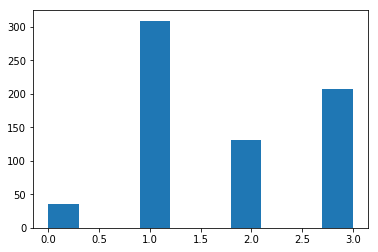

In [55]:
# Plotting the new column "I3_Bins"
plt.hist(df_data.I3_Bins)

In [56]:
### Due to the bins `0` and `2`, we have decided to combine them by updating the function "I3_Binning"
def I3_Binning(I3):
    if I3 < 2000:
        return(2)
    if I3 >= 2000 and I3 <= 3999:
        return(1)
    if I3 >= 4000 and I3 <= 6999:
        return(2)
    if I3 >= 7000:
        return(3)

# Applying the function "I3_Binning"
df_data['I3_Bins'] = df_data.I3.apply(I3_Binning)
# Displaying to check the datafram
df_data.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C4,...,C6',T3',T4',T5',S1',S2',S3',Y1,Y2,I3_Bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,2.397895,2.351375,2.251292,2.554899,4.812184,1.0,0.028660,...,6.803505,0.614244,0.466674,0.047932,0.004706,0.009157,0.010869,0,1,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,2.197225,2.397895,2.197225,2.110213,5.035328,0.0,-0.013442,...,0.000000,0.402186,0.302583,0.028254,0.002750,0.011044,0.010817,1,0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,2.079442,2.708050,2.564949,2.041220,4.510860,1.0,0.020503,...,0.000000,0.776228,0.585412,0.065705,0.006504,0.006252,0.011338,1,0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,2.525729,2.833213,2.708050,2.594508,5.347108,1.0,0.019825,...,0.000000,0.835659,0.616339,0.072892,0.007239,0.007118,0.013231,1,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,3.091042,3.091042,2.995732,4.053523,4.394449,1.0,-0.035518,...,7.601402,0.546682,0.397861,0.041248,0.004038,0.009997,0.011198,0,1,2


(array([309.,   0.,   0.,   0.,   0., 166.,   0.,   0.,   0., 207.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

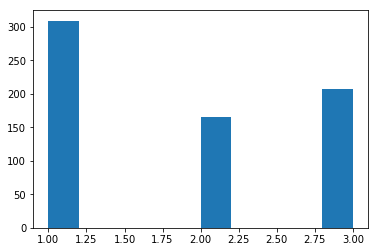

In [57]:
# Plotting the bins that we created

plt.hist(df_data['I3_Bins'])

In [58]:
# Displaying the head of the dataframe
df_data.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1Day,C1,C2,C4,...,C6',T3',T4',T5',S1',S2',S3',Y1,Y2,I3_Bins
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,2.397895,2.351375,2.251292,2.554899,4.812184,1.0,0.028660,...,6.803505,0.614244,0.466674,0.047932,0.004706,0.009157,0.010869,0,1,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,2.197225,2.397895,2.197225,2.110213,5.035328,0.0,-0.013442,...,0.000000,0.402186,0.302583,0.028254,0.002750,0.011044,0.010817,1,0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,2.079442,2.708050,2.564949,2.041220,4.510860,1.0,0.020503,...,0.000000,0.776228,0.585412,0.065705,0.006504,0.006252,0.011338,1,0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,2.525729,2.833213,2.708050,2.594508,5.347108,1.0,0.019825,...,0.000000,0.835659,0.616339,0.072892,0.007239,0.007118,0.013231,1,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,3.091042,3.091042,2.995732,4.053523,4.394449,1.0,-0.035518,...,7.601402,0.546682,0.397861,0.041248,0.004038,0.009997,0.011198,0,1,2


In [59]:
# Creating target variables to use to concatinate into a dataframe
target1 = df_data.iloc[:,:7]
target2 = df_data.iloc[:,20:22]

# Creating the "Targets_MinMax" variable/dataframe
Targets_MinMax = pd.concat([target1,target2],axis=1,join_axes=[df_data.index])
print(Targets_MinMax.head(2))

     I1                                  I2      I3     P_IPO       P_H  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674.0  2.397895  2.351375   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834.0  2.197225  2.397895   

        P_L    P_1Day  Y1  Y2  
0  2.251292  2.554899   0   1  
1  2.197225  2.110213   1   0  


In [60]:
#### ALREADY SAVED THIS, DO NOT HAVE TO SAVE EVERY TIME
# Saving the Targets_MinMax to a .csv file for future use
# Targets_MinMax.to_csv("Targets_MinMax", ",")

## Correlation Analysis ##

The correlation analysis should be done before doing the RFE (Recursive Feature Extraction) because it helps remove highly correlated features that could result in the RFE model being biased towards those features.

In [61]:
# Beginning correlation analysis
correlation_df = df_data
targets = Targets_MinMax
correlation = pd.concat([correlation_df, targets], axis=1, join_axes=[correlation_df.index])

print(correlation.corr(method='spearman'))

               I3     P_IPO       P_H       P_L    P_1Day        C1        C2  \
I3       1.000000  0.099088  0.005486  0.004021  0.074290  0.057213 -0.040476   
P_IPO    0.099088  1.000000  0.799302  0.800787  0.644600 -0.067441  0.267550   
P_H      0.005486  0.799302  1.000000  0.996201  0.444134 -0.054105  0.281331   
P_L      0.004021  0.800787  0.996201  1.000000  0.446602 -0.052103  0.292272   
P_1Day   0.074290  0.644600  0.444134  0.446602  1.000000 -0.027377  0.234564   
C1       0.057213 -0.067441 -0.054105 -0.052103 -0.027377  1.000000  0.003051   
C2      -0.040476  0.267550  0.281331  0.292272  0.234564  0.003051  1.000000   
C4      -0.039076 -0.001856 -0.039367 -0.043298  0.003284  0.108412 -0.031654   
C7       0.022611  0.308062  0.420955  0.420373  0.132236  0.048712  0.169323   
C3'      0.108454  0.158533  0.143288  0.149272  0.034618  0.001202  0.010506   
C5'      0.056486  0.024010 -0.014529 -0.016765  0.086564 -0.009599  0.150657   
C6'      0.086686  0.628851 

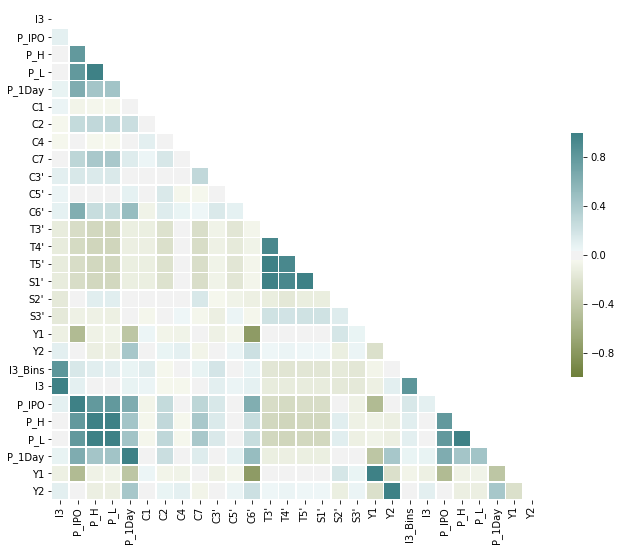

In [80]:
from pandas.plotting import scatter_matrix

# Visualizing a Correlation Matrix
correlation_visual = correlation.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [76]:
# Checking to see if there are any features that are highly correlated with the target variables

y1 = correlation.corr()['Y1'] > 0.5
y2 = correlation.corr()['Y1'] < -0.5

# Printing the 'logical OR' with the 2 variables
y1 | y2

,Y1,Y1
I3,False,False
P_IPO,False,False
P_H,False,False
P_L,False,False
P_1Day,False,False
C1,False,False
C2,False,False
C4,False,False
C7,False,False
C3',False,False


In [78]:
# Checking to see if there are any features that are highly correlated with the target variables

y1 = correlation.corr()['Y2'] > 0.5
y2 = correlation.corr()['Y2'] < -0.5

# Printing the 'logical OR'
y1 | y2

,Y2,Y2
I3,False,False
P_IPO,False,False
P_H,False,False
P_L,False,False
P_1Day,False,False
C1,False,False
C2,False,False
C4,False,False
C7,False,False
C3',False,False


## RFE: Recursive Feature Extraction ## 

In [ ]:
# Important useful packages for RFE
